# Assigment 1 solution:

## Part 1: Data scraping and preparation 

### a) Import all the needed librares  

In [1]:
import pandas as pd
import requests as rq 
import numpy as np 
import bs4 as bs
from datetime import datetime

### b) Scrap spaceweather data 

In [2]:
# Here we are going to scrap the data by get request and then apply beautifulsoup on it to parse and get the appropiate data
# that we want from the html.Then, we are going to loop on the scarpped table rows -row by row- and put each element 
# in its specified array.Finally, we are going to initiate each array to represent a column in the pandas dataframe.
#----------------------------------------------------------------------------------------------------------------------------#

source = rq.get('https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares').text
soup = bs.BeautifulSoup(source,'html')
html_table=soup.find('table')
rank = []
x_class = []
date = []
region = []
start_time = []
max_time = []
end_time = []
movie = []
for row in html_table.find_all('tr')[1:51]:
    tds = row.find_all('td')
    rank.append(int(tds[0].text))
    if(tds[1].text[-1] == '+'):
        x_class.append(tds[1].text[:3])
    else:
        x_class.append(tds[1].text)
    date.append(tds[2].text)
    region.append(int(tds[3].text))
    start_time.append(tds[4].text)
    max_time.append(tds[5].text)
    end_time.append(tds[6].text)
    movie.append(tds[7].text)
    
    
pd_table = pd.DataFrame({'rank':rank, 'x_class':x_class,'date':date, 'region':region,'start_time':start_time,'max_time':max_time,'end_time':end_time,'movie':movie}) 
pd_table.head(10)

,rank,x_class,date,region,start_time,max_time,end_time,movie
0,1,X28,2003/11/04,486,19:29,19:53,20:06,MovieView archive
1,2,X20,2001/04/02,9393,21:32,21:51,22:03,MovieView archive
2,3,X17,2003/10/28,486,09:51,11:10,11:24,MovieView archive
3,4,X17,2005/09/07,808,17:17,17:40,18:03,MovieView archive
4,5,X14.4,2001/04/15,9415,13:19,13:50,13:55,MovieView archive
5,6,X10,2003/10/29,486,20:37,20:49,21:01,MovieView archive
6,7,X9.4,1997/11/06,8100,11:49,11:55,12:01,MovieView archive
7,8,X9.3,2017/09/06,2673,11:53,12:02,12:10,MovieView archive
8,9,X9,2006/12/05,930,10:18,10:35,10:45,MovieView archive
9,10,X8.3,2003/11/02,486,17:03,17:25,17:39,MovieView archive


### c) Tidy the top 50 solar flare data

In [3]:
#dropping the last column
pd_table = pd_table.drop(columns= 'movie')

#converting the(start_time),(max_time),(end_time) columns to datetime object and removing the (date) column
for index,row in pd_table.iterrows():
    pd_table.at[index, 'start_time']  = datetime.strptime(row['date']+' '+row['start_time'],'%Y/%m/%d %H:%M')
    pd_table.at[index, 'max_time']  = datetime.strptime(row['date']+' '+row['max_time'],'%Y/%m/%d %H:%M')
    pd_table.at[index, 'end_time']  = datetime.strptime(row['date']+' '+row['end_time'],'%Y/%m/%d %H:%M')
pd_table = pd_table.drop(columns= 'date')

#reordering the tables by moving the columns
pd_table = pd_table.reindex(columns = ['rank','x_class','start_time','max_time','end_time','region'])

#replacing missing cells with (NaN) in region column
pd_table = pd_table.replace(to_replace= '-',value= np.nan)

pd_table[:10]

,rank,x_class,start_time,max_time,end_time,region
0,1,X28,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00,486
1,2,X20,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00,9393
2,3,X17,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00,486
3,4,X17,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00,808
4,5,X14.4,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00,9415
5,6,X10,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00,486
6,7,X9.4,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00,8100
7,8,X9.3,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00,2673
8,9,X9,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00,930
9,10,X8.3,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00,486


### d) Scrape the NASA data

In [4]:
#scraping the data using request and parsing it using beautifulsoap
nasa_url = 'https://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2.html'
nasa_html = rq.get(nasa_url)
nasa_soup = bs.BeautifulSoup(nasa_html.text,'html.parser')

#finding the content of the table by searching the <pre> tag
nasa_table = nasa_soup.find('pre')
nasa_data = nasa_table.text

data = []
sd = []
st = []
ed = []
et = []
sf = []
ef = []
fl = []
fr = []
imp = []
cme_date= []
cme_time = []
CPA = []
is_halo = []
width =  []
speed = []
plots = []
lowerbound = []

#making each row a list on its own
for word in nasa_data.split('\n'):
    data.append(word)

data = data[12:-3]   

#adding the data from the list of rows into its corresponding variables, and handling any missing
#cells -cells containing values like (---),(-)- by replacing it with (NaN) using try,except method
for row in data:
    x = row.split()[:15]
    sd.append(x[0])
    st.append(x[1])
    ed.append(x[2])
    et.append(x[3])
    try:
        sf.append(float(x[4]))
    except:
        sf.append(np.nan)
    try:
        ef.append(float(x[5]))
    except:
        ef.append(np.nan)

#in flare_location column we handle the different entries like (BACK),(Back?) and replacing it with (NaN)
    if(x[6] == 'BACK'or x[6] == 'Back' or x[6] == 'Back?'):
        fl.append(np.nan)
    else:    
        fl.append(x[6])

    try:
        fr.append(int(x[7]))
    except:
        fr.append(np.nan)    
        
#handling the Importance column and the dot(.) at the end of the value. we have to remove it for 
#furthur computations
    if (x[8] == '----'):
        imp.append(np.nan)
    elif ( x[8][3] == '.'):
        imp.append(x[8][:3])
    else:    
        imp.append(x[8])   
        
    cme_date.append(x[9])        
    cme_time.append(x[10])
    
#handling the Halo values in the CPA column by adding extra column named (is_halo) to hold boolean
#values and put (True) if (Halo) value encounterd
    try:
        CPA.append(float(x[11]))
        is_halo.append(False)
    except: 
        CPA.append(np.nan)
        is_halo.append(True)    
        
#handling the lowerbound values in the width column by adding extra column named (lowerbound) to hold
#boolean values and put (True) if the special character (>) was encountered at the beginning of the 
#string and removing this sign from the width column and adding the number as intger
    try:  
        width.append(int(x[12]))
        lowerbound.append(False)
    except:
        
        if(x[12][0] == '>'):
                width.append(int(x[12][1:]))
                lowerbound.append(True)
        else:
                width.append(np.nan)
                lowerbound.append(np.nan)        

    try:
        speed.append(float(x[13]))
    except:
        speed.append(np.nan)
        
    plots.append(x[14])        

#representing all the aquired data in a panda's dataframe    
pd.DataFrame({'Start_Date':sd,'Start_Time':st,'End_Date':ed,'End_Time':et,'Start_Frequency':sf,'End_Frequency':ef,'Flare_Location':fl,'Flare_Region':fr,'Importance':imp,'CME_Date':cme_date,'CME_Time':cme_time,'CPA':CPA})

,Start_Date,Start_Time,End_Date,End_Time,Start_Frequency,End_Frequency,Flare_Location,Flare_Region,Importance,CME_Date,CME_Time,CPA
0,1997/04/01,14:00,04/01,14:15,8000.0,4000.0,S25E16,8026.0,M1.3,04/01,15:18,74.0
1,1997/04/07,14:30,04/07,17:30,11000.0,1000.0,S28E19,8027.0,C6.8,04/07,14:27,NaN
2,1997/05/12,05:15,05/14,16:00,12000.0,80.0,N21W08,8038.0,C1.3,05/12,05:30,NaN
3,1997/05/21,20:20,05/21,22:00,5000.0,500.0,N05W12,8040.0,M1.3,05/21,21:00,263.0
4,1997/09/23,21:53,09/23,22:16,6000.0,2000.0,S29E25,8088.0,C1.4,09/23,22:02,133.0
...,...,...,...,...,...,...,...,...,...,...,...,...
512,2017/07/23,05:27,07/23,06:12,4400.0,900.0,NaN,NaN,NaN,07/23,04:48,NaN
513,2017/09/04,20:27,09/05,04:54,14000.0,210.0,S10W12,12673.0,M5.5,09/04,20:12,NaN
514,2017/09/06,12:05,09/07,08:00,16000.0,70.0,S08W33,12673.0,X9.3,09/06,12:24,NaN
515,2017/09/10,16:02,09/11,06:50,16000.0,150.0,S09W92,NaN,X8.3,09/10,16:00,NaN


### e) Tidy the NASA table

In [5]:
#converting the(start_time),(end_time),(CME_time) columns to datetime object and removing 
#the (start_date),(end_date),(CME_date) columns and handling any false entry by adding (NaN) instead
start_datetime = []
end_datetime = []
cme_datetime = []
for i in range (len(st)):
    sd[i] = datetime.strptime(sd[i],'%Y/%m/%d')
    st[i] = datetime.strptime(st[i],'%H:%M')
    ed[i] = datetime.strptime(str(sd[i].year) +'/' + ed[i] ,'%Y/%m/%d')
    try:
        et[i] = datetime.strptime(et[i],'%H:%M')
    except:
        et[i] = datetime.strptime('00:00','%H:%M')
    try:    
        cme_date[i] = datetime.strptime(str(sd[i].year) +'/' + cme_date[i] ,'%Y/%m/%d')
    except:
         cme_date[i] = np.nan
    try:        
        cme_time[i] = datetime.strptime(cme_time[i],'%H:%M')
    except:
            cme_time[i] = np.nan
 
    start_datetime.append(datetime(sd[i].year,sd[i].month,sd[i].day,st[i].hour,st[i].minute))
    end_datetime.append(datetime(ed[i].year,ed[i].month,ed[i].day,et[i].hour,et[i].minute))
    try:
        cme_datetime.append(datetime(cme_date[i].year,cme_date[i].month,cme_date[i].day,cme_time[i].hour,cme_time[i].minute))
    except:
        cme_datetime.append(np.nan)

#representing the final dataframe after tidying the data
nasa_df = pd.DataFrame({'Start_DateTime':start_datetime,'End_DateTime':end_datetime ,'Start_Frequency':sf,'End_Frequency':ef,'Flare_Location':fl,'Flare_Region':fr,'Importance':imp,'CME_DateTime':cme_datetime,'CPA':CPA,'Width':width,'Speed':speed,'Plots':plots,'Is_Halo':is_halo,'Width_LowerBound':lowerbound})
nasa_df[:10]

,Start_DateTime,End_DateTime,Start_Frequency,End_Frequency,Flare_Location,Flare_Region,Importance,CME_DateTime,CPA,Width,Speed,Plots,Is_Halo,Width_LowerBound
0,1997-04-01 14:00:00,1997-04-01 14:15:00,8000.0,4000.0,S25E16,8026.0,M1.3,1997-04-01 15:18:00,74.0,79.0,312.0,PHTX,False,False
1,1997-04-07 14:30:00,1997-04-07 17:30:00,11000.0,1000.0,S28E19,8027.0,C6.8,1997-04-07 14:27:00,NaN,360.0,878.0,PHTX,True,False
2,1997-05-12 05:15:00,1997-05-14 16:00:00,12000.0,80.0,N21W08,8038.0,C1.3,1997-05-12 05:30:00,NaN,360.0,464.0,PHTX,True,False
3,1997-05-21 20:20:00,1997-05-21 22:00:00,5000.0,500.0,N05W12,8040.0,M1.3,1997-05-21 21:00:00,263.0,165.0,296.0,PHTX,False,False
4,1997-09-23 21:53:00,1997-09-23 22:16:00,6000.0,2000.0,S29E25,8088.0,C1.4,1997-09-23 22:02:00,133.0,155.0,712.0,PHTX,False,False
5,1997-11-03 05:15:00,1997-11-03 12:00:00,14000.0,250.0,S20W13,8100.0,C8.6,1997-11-03 05:28:00,240.0,109.0,227.0,PHTX,False,False
6,1997-11-03 10:30:00,1997-11-03 11:30:00,14000.0,5000.0,S16W21,8100.0,M4.2,1997-11-03 11:11:00,233.0,122.0,352.0,PHTX,False,False
7,1997-11-04 06:00:00,1997-11-05 04:30:00,14000.0,100.0,S14W33,8100.0,X2.1,1997-11-04 06:10:00,NaN,360.0,785.0,PHTX,True,False
8,1997-11-06 12:20:00,1997-11-07 08:30:00,14000.0,100.0,S18W63,8100.0,X9.4,1997-11-06 12:10:00,NaN,360.0,1556.0,PHTX,True,False
9,1997-11-27 13:30:00,1997-11-27 14:00:00,14000.0,7000.0,N17E63,8113.0,X2.6,1997-11-27 13:56:00,98.0,91.0,441.0,PHTX,False,False


## Part 2: Analysis 

### Question 1 : Replication

#### Code used to ordering the top 50 solar flares:

In [6]:
#replicating the NASA table but ordering it with the (x-class) -> (was <importance>) descending order
#and removing all the unnecessary columns to make the NASA repilca table look excatly like the data in
#SpaceWeatherLive.com table 
nasa_df['num'] = nasa_df['Importance'].str.replace('[a-zA-Z]+','0').astype(float)
nasa_df = nasa_df.sort_index(ascending=False)
nasa_df['label'] = nasa_df['Importance'].str.replace('.','')
nasa_df['label'] = nasa_df['label'].str.replace('[0-9]','')
nasa_df = nasa_df.sort_values(['label', 'num'], ascending=[False, False]).drop(columns = ['label','num'])

#taking the top 50 rows in the nasa replica table and represting it in a pandas's dataframe
rank = range(1,51)
top50_table = nasa_df[:50]
nasa_replica = pd.DataFrame({'rank':rank,'x_class':top50_table['Importance'],'start_time':top50_table['Start_DateTime'],'end_time':top50_table['End_DateTime'],'region':top50_table['Flare_Region']})
nasa_replica = nasa_replica.reset_index(drop = True)
nasa_replica[:10]

,rank,x_class,start_time,end_time,region
0,1,X28,2003-11-04 20:00:00,2003-11-04 00:00:00,10486.0
1,2,X20,2001-04-02 22:05:00,2001-04-03 02:30:00,9393.0
2,3,X17,2003-10-28 11:10:00,2003-10-29 00:00:00,10486.0
3,4,X14,2001-04-15 14:05:00,2001-04-16 13:00:00,9415.0
4,5,X10,2003-10-29 20:55:00,2003-10-29 00:00:00,10486.0
5,6,X9.4,1997-11-06 12:20:00,1997-11-07 08:30:00,8100.0
6,7,X9.3,2017-09-06 12:05:00,2017-09-07 08:00:00,12673.0
7,8,X9.0,2006-12-05 10:50:00,2006-12-05 20:00:00,10930.0
8,9,X8.3,2017-09-10 16:02:00,2017-09-11 06:50:00,NaN
9,10,X8.3,2003-11-02 17:30:00,2003-11-03 01:00:00,10486.0


### Question 2: Integration 

In [7]:
#creating a function the compares the NASA top 50 solar flares with the SpaceWeatherLive.com table
#-----------------------------------
#first we compare by start_time column if both times are equal we subtract the x-classes from each other
#-----------------------------------
#if the result is smaller than the value in (before)
#we put the row index of SpaceWeatherLive.com table in the 'compatitor_rank' column
#-----------------------------------
#if the result is not zero or equal to a result happened before (means there is duplicate x-class)
#we subtract the (start, end) times from each other and find the mean of these results
#then comparing it to the mean found before (if any) then picking the lowest result and putting it as the colsest row
def best_matching(df1,df2):
    compatitorRank = [] 
    start_end_list = []
    mean_list = []
    for lab , row in df1.iterrows():
        now_mean = 1000000
        before_mean = 1000000
        before = 1000000
        for lab2,row2 in df2.iterrows():
            if(row['start_time'].date() == row2['start_time'].date()):
                now = abs(float(row2['x_class'][1:])-float(row['x_class'][1:]))
                if(before > now):
                    before = now
                    df1.loc[lab,'compatitor_rank'] = row2['rank']
                elif(before==now):
                    if(row2['start_time'] > row['start_time']):
                        time_diff = row2['start_time'] - row['start_time']
                    else:
                        time_diff = row['start_time'] - row2['start_time']
                    if (row2['end_time'] > row['end_time']):    
                        time_diff2 = row2['end_time'] - row['end_time']
                    else:
                        time_diff2 = row['end_time'] - row2['end_time']

                    now_mean=np.mean([time_diff.seconds,time_diff2.seconds])  
                    if (before_mean >now_mean):
                        before_mean = now_mean
                        df1.loc[lab,'compatitor_rank'] = row2['rank']

    return df1

In [8]:
#function call using the NASA replica table and the SpaceWeatherLive.com table
x= best_matching(nasa_replica,pd_table)
x

,rank,x_class,start_time,end_time,region,compatitor_rank
0,1,X28,2003-11-04 20:00:00,2003-11-04 00:00:00,10486.0,1.0
1,2,X20,2001-04-02 22:05:00,2001-04-03 02:30:00,9393.0,2.0
2,3,X17,2003-10-28 11:10:00,2003-10-29 00:00:00,10486.0,3.0
3,4,X14,2001-04-15 14:05:00,2001-04-16 13:00:00,9415.0,5.0
4,5,X10,2003-10-29 20:55:00,2003-10-29 00:00:00,10486.0,6.0
5,6,X9.4,1997-11-06 12:20:00,1997-11-07 08:30:00,8100.0,7.0
6,7,X9.3,2017-09-06 12:05:00,2017-09-07 08:00:00,12673.0,8.0
7,8,X9.0,2006-12-05 10:50:00,2006-12-05 20:00:00,10930.0,9.0
8,9,X8.3,2017-09-10 16:02:00,2017-09-11 06:50:00,NaN,11.0
9,10,X8.3,2003-11-02 17:30:00,2003-11-03 01:00:00,10486.0,10.0


### Question 3: Analysis

In [9]:
#counting the number of solar flares happened in each month over time using the whole NASA dataset
#and doing the same procedure using the NASA replica table (top 50 solar flares)
flares_per_month = []
strong_flares = []
for i in range(1,13):
    flares_per_month.append(len(nasa_df[nasa_df['Start_DateTime'].dt.month == i]))
    strong_flares.append(len(top50_table[top50_table['Start_DateTime'].dt.month == i]))

#calculating the percentage of strong flares in each month 
strongFlaresPerMonth = []
strFlares = []
for i in range (0,12):
    strongFlaresPerMonth.append(round((strong_flares[i]/flares_per_month[i])*100,2))
for i in range (0,12):
    strFlares.append(str(strongFlaresPerMonth[i])+'%')

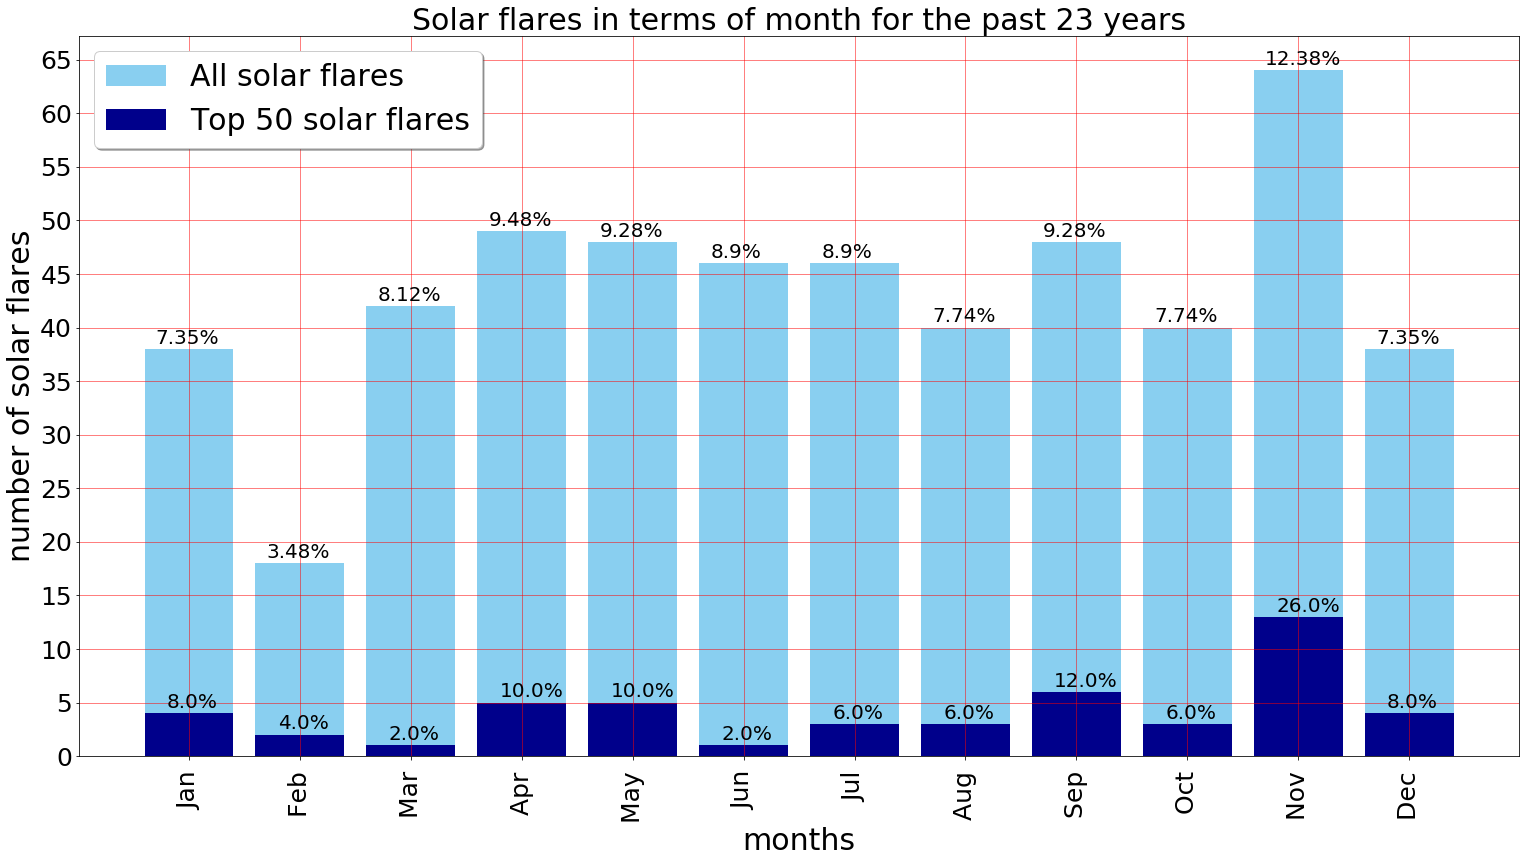

In [13]:
#representation of the number of flares and the number of strong flares happened each month 
#using bar chart as a graphical element for furthur demonstartion
import matplotlib.pyplot as plt
months = ['Jan ','Feb ','Mar ','Apr ','May ','Jun ','Jul ','Aug ','Sep ','Oct ','Nov ','Dec ']
graph = plt.figure(figsize= (20,10))
axis = graph.add_axes([0,0,1,1])
rects = axis.bar(months,flares_per_month,color = '#89cff0',label = 'All solar flares')
rects1 =axis.bar(months,strong_flares,color = '#00008b',label = 'Top 50 solar flares')
plt.xticks(fontsize = 25,rotation = 90)
plt.yticks(np.arange(0,70,5),fontsize=25)
plt.xlabel('months',fontsize = 30)
plt.ylabel('number of solar flares',fontsize = 30)
plt.title('Solar flares in terms of month for the past 23 years',fontsize = 30)

# set individual bar lables using above list
for i in rects1.patches:
    # get_width pulls left or right; get_y pushes up or down
        axis.text(i.get_x()+0.2, i.get_height()+0.5, \
                str(round((i.get_height()/sum(strong_flares))*100, 2))+'%', fontsize=20,
    color='black')
        
for i in rects.patches:
    # get_width pulls left or right; get_y pushes up or down
        axis.text(i.get_x()+0.1, i.get_height()+0.5, \
                str(round((i.get_height()/sum(flares_per_month))*100, 2))+'%', fontsize=20,
    color='black')        
              
axis.grid(linestyle='-', linewidth='0.5', color='red')        
plt.legend(loc='best',fontsize = 30,shadow = True,facecolor = 'white')
plt.show()

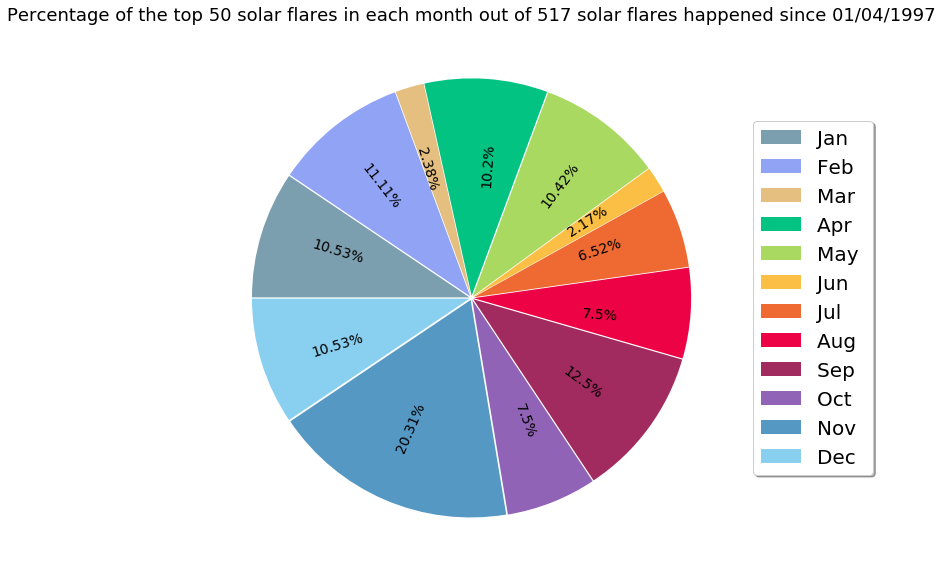

In [11]:
#representation of the percentage of strong flares each month plotted as a pie chart 
fig, ax = plt.subplots(figsize=(10,10), subplot_kw=dict(aspect="equal"))
plt.rcParams['font.size'] = 14
ax.pie(strongFlaresPerMonth, labeldistance = 0.5, labels=strFlares,rotatelabels = 90,
startangle = 180,counterclock = False,explode = [0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01], colors =['#7c9fb0','#91a3f5','#e4bf80','#03c383','#aad962','#fbbf45','#ef6a32','#ed0345','#a12a5e','#9163b6','#5698c4','#89cff0'])
plt.legend(loc='center left',labels = months,fontsize = 20,shadow = True,facecolor = 'white',bbox_to_anchor=(1, 0.5))
ax.set_title('Percentage of the top 50 solar flares in each month out of 517 solar flares happened since 01/04/1997',size = 18,loc = 'center')
plt.show()

### Prezi link (Used slideshows): https://prezi.com/p/wjlszlp5dtup/data-science-project-1/?present=1

### Presentation link: https://drive.google.com/open?id=1xydboO7mNzuC9oX-mAW9A-9-kye6oR3-

<h1><center>Thanks!!</center></h1>
